## Part A: Model Code

#### A(1). Write a function to calculate and return the Euclidean distance of two vectors.

In [2]:
def euclidean_distance(xVec, yVec):
    if len(xVec) == len(yVec):
        output = 0
        for i in range(len(xVec)-1):
            output += (xVec[i] - yVec[i])**2
        output = np.sqrt(output)
        return output
    else:
        return "Error: vectors are of different dinmentsions!"

#### A(2). Write a function to calculate and return the manhattam distance of two vectors.

In [3]:
def manhattan_distance(xVec, yVec):
    if len(xVec) == len(yVec):
        output = 0
        for i in range(len(xVec)-1):
            output += abs(xVec[i] - yVec[i])
        return output
    else:
        return "Error: vectors are of different dinmentsions!"


#### A(3). Write a function to calculate and return the accuracy and generalization of two vectors.

In [4]:
def accuracy_generalization(predVec, trueVec):
    # Accuracy = tp+tn/total
    if len(predVec) == len(trueVec):
        true_positive = 0
        true_negative = 0
        for i in range(len(predVec)):
                if predVec[i] == 1 and trueVec[i] == 1:
                    true_positive +=1
                elif predVec[i] == 0 and trueVec[i] == 0:
                    true_negative +=1
        return (true_positive+true_negative)/len(predVec)
        
    else:
        return "Error: vectors are of different dinmentsions!"

#### A(4). Write three functions to compute: precision, recall and F1 score.

In [5]:
def precision(predVec, trueVec):
    if len(predVec) == len(trueVec):
        true_positive = 0
        true_negative = 0
        false_positive = 0
        false_negative = 0
        for i in range(len(predVec)):
            if predVec[i] == 1 and trueVec[i] == 1:
                true_positive += 1
            elif predVec[i] == 0 and trueVec[i] == 0:
                true_negative += 1
            elif predVec[i] == 1 and trueVec[i] == 0:
                false_positive += 1
            elif predVec[i] == 0 and trueVec[i] == 1:
                false_negative += 1
        return true_positive / (true_positive + false_positive), true_positive / (true_positive + false_negative), true_positive / (true_positive + ((false_negative + false_positive) / 2))
    else:
        return "Error: vectors are of different dinmentsions!"

#### A(5). Write a function to compute the confusion matrix of two vectors.

In [6]:
def confusion_matrix(predVec, trueVec):
    if len(predVec) == len(trueVec):
        true_positive = 0
        true_negative = 0
        false_positive = 0
        false_negative = 0
        for i in range(len(predVec)):
            if predVec[i] != -1: #If threshold is not reached this line ensures that that data row will be dropped.
                if predVec[i] == 1 and trueVec[i] == 1:
                    true_positive += 1
                elif predVec[i] == 0 and trueVec[i] == 0:
                    true_negative += 1
                elif predVec[i] == 1 and trueVec[i] == 0:
                    false_positive += 1
                elif predVec[i] == 0 and trueVec[i] == 1:
                    false_negative += 1
        conf_matrix = [true_negative, false_positive, false_negative, true_positive]
   #     print("      Predicted: NO ", "    Predicted: YES ")
    #    print(" ")
    #    print("Actual: NO     ",conf_matrix[0],"      ", conf_matrix[1])
    #    print(" ")
    #    print("Actual: YES     ",conf_matrix[2],"      ", conf_matrix[3])
    #    print(" ")

        return conf_matrix
    else:
        return "Error: vectors are of different dinmentsions!"
    # Pre
  #       N  Y
  #   N  TN  FP
# AC  Y  FN  TP
   

#### A(6). Write a ROC curve function.

In [7]:
def roc(true_positive_rate, false_positive_rate):
    plt.plot(false_positive_rate, true_positive_rate)
    plt.plot([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1], [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1], color='red', linestyle='dashed')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()

#### A(7). Write a function to compute area under curve (AUC).

In [8]:
import numpy as np
import matplotlib.pyplot as plt
array1 = [0.1,0.3,0.5,0.7]
array2 = [0.6,0.8,0.7,0.88]

def auc(true_positive_rate, false_positive_rate):
    auc = 0
    dis_ = []
    for i in range(len(false_positive_rate)-1):
        dis_.append(false_positive_rate[i+1]-false_positive_rate[i])
    dis_.append(1-false_positive_rate[len(false_positive_rate)-1])
    
    for element_in_y in range(len(true_positive_rate)):
        auc += dis_[element_in_y]*true_positive_rate[element_in_y]
    print('AUC is :', auc)
    return auc

auc(array2, array1)

AUC is : 0.684


0.684

#### A(8) [Extra Credit for 353 and Mandatory for 795] Write a function to generate the precisionrecall curve.

In [9]:
def precision_recall(recall, precision):
    x = [ .2, .3, .4, .5, .6, .7 ,.8]
    plt.plot(x, recall, 'r', label = 'Recall') # plotting t, a separately 
    plt.plot(x, precision, 'b', label = 'Precision') # plotting t, b separately 
    plt.legend()
    plt.show()

#### A(9) Implement a KNN_Classifier model class.

In [10]:
class KNN_Classifier:
    def fit(self, X, Y, n_neighbors, weights, kwargs):
        
        # Store all the parameters for the classifier
        self.X = X  
        self.Y = Y  
        self.n_neighbors = n_neighbors 
        self.weights = weights 
        self.kwargs = kwargs 
        
    def predict(self, X):
        import random
        self.Z = X 
        prediction_list = []
        predicted_neighbors = []
        zero_count = 0
        one_count = 0
        threshold = self.kwargs['threshold']
        
        # Nested loop of the classifier 
        for test_row in self.Z:
            for train_row in self.X:
                
                # Classifier distance options
                if self.kwargs['distance'] == 'manhattan_distance':
                    dist = manhattan_distance(test_row, train_row)
                    prediction_list.append([dist, train_row[self.X.shape[1]-1]]) 
                    
                elif self.kwargs['distance'] == 'euclidean_distance':
                    dist = euclidean_distance(test_row, train_row)
                    prediction_list.append([dist, train_row[self.X.shape[1]-1]]) 
                    
            prediction_list.sort()
            prediction_list = prediction_list[:self.n_neighbors]
            
            # Classifier weight function options
            if self.weights == 'distance':
                total = 0
                exception = 0
                pos = 0
                
                for i in range(self.n_neighbors):
                    if prediction_list[i][0] != 0:
                        prediction_list[i][0] = 1/prediction_list[i][0]
                        total += prediction_list[i][0]
                    else:
                        prediction_list[i][0] = 1/0.0001
                        total += prediction_list[i][0]
        
                for i in range(self.n_neighbors):
                    prediction_list[i][0] = prediction_list[i][0]/total
                    
                for i in range(self.n_neighbors):
                    if prediction_list[i][1] == 0:
                        zero_count += prediction_list[i][0]
                    else:
                        one_count += prediction_list[i][0]
                        
                if zero_count == 0:
                    predicted_neighbors.append(1)
                elif one_count== 0:
                    predicted_neighbors.append(0)
                elif zero_count >= threshold:
                    predicted_neighbors.append(0)
                elif one_count >= threshold:
                    predicted_neighbors.append(1)
                else:
                    predicted_neighbors.append(-1) #(-1) will be used to drop the value that did not reach the threshold
                    
                zero_count = 0
                one_count = 0
                prediction_list = []    
                
            elif self.weights == 'uniform':
                for i in range(self.n_neighbors):
                    if prediction_list[i][1] == 0:
                        zero_count += 1
                    else:
                        one_count +=1
                
                if zero_count == 0:
                    predicted_neighbors.append(1)
                elif one_count == 0:
                    predicted_neighbors.append(0)
                elif zero_count/(one_count+zero_count) >= threshold:
                    predicted_neighbors.append(0)
                elif one_count/(one_count+zero_count) >= threshold:
                    predicted_neighbors.append(1)
                else:
                    predicted_neighbors.append(-1) #(-1) will be used to drop the value that did not reach the threshold

                        
                zero_count = 0
                one_count = 0
                prediction_list = []
                
        pre_array = np.array(predicted_neighbors)
        pre_array.shape = (len(predicted_neighbors), 1)
        
        return pre_array
    def __init__(self):
        pass

## Part B: Data Processing

In [11]:
import pandas as pd
df = pd.read_csv("winequality-white.csv", sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


#### B(11) The target will be the “quality” column which represents rating of wine and ranges from 3 t0 8.

In [12]:
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

In [13]:
df['quality'] = (df['quality'] > 5).astype(np.int)

#### B(12) Summarize each of the variables in the dataset in terms of mean, standard deviation, and quartiles

In [14]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,0.665169
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.471979
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


#### B(13) Shuffle the rows of your data.

In [15]:
df = df.sample(frac=1)

#### B(14) Generate pair plots using the seaborn package. This will be used to identify and report the redundant features, if there is any.

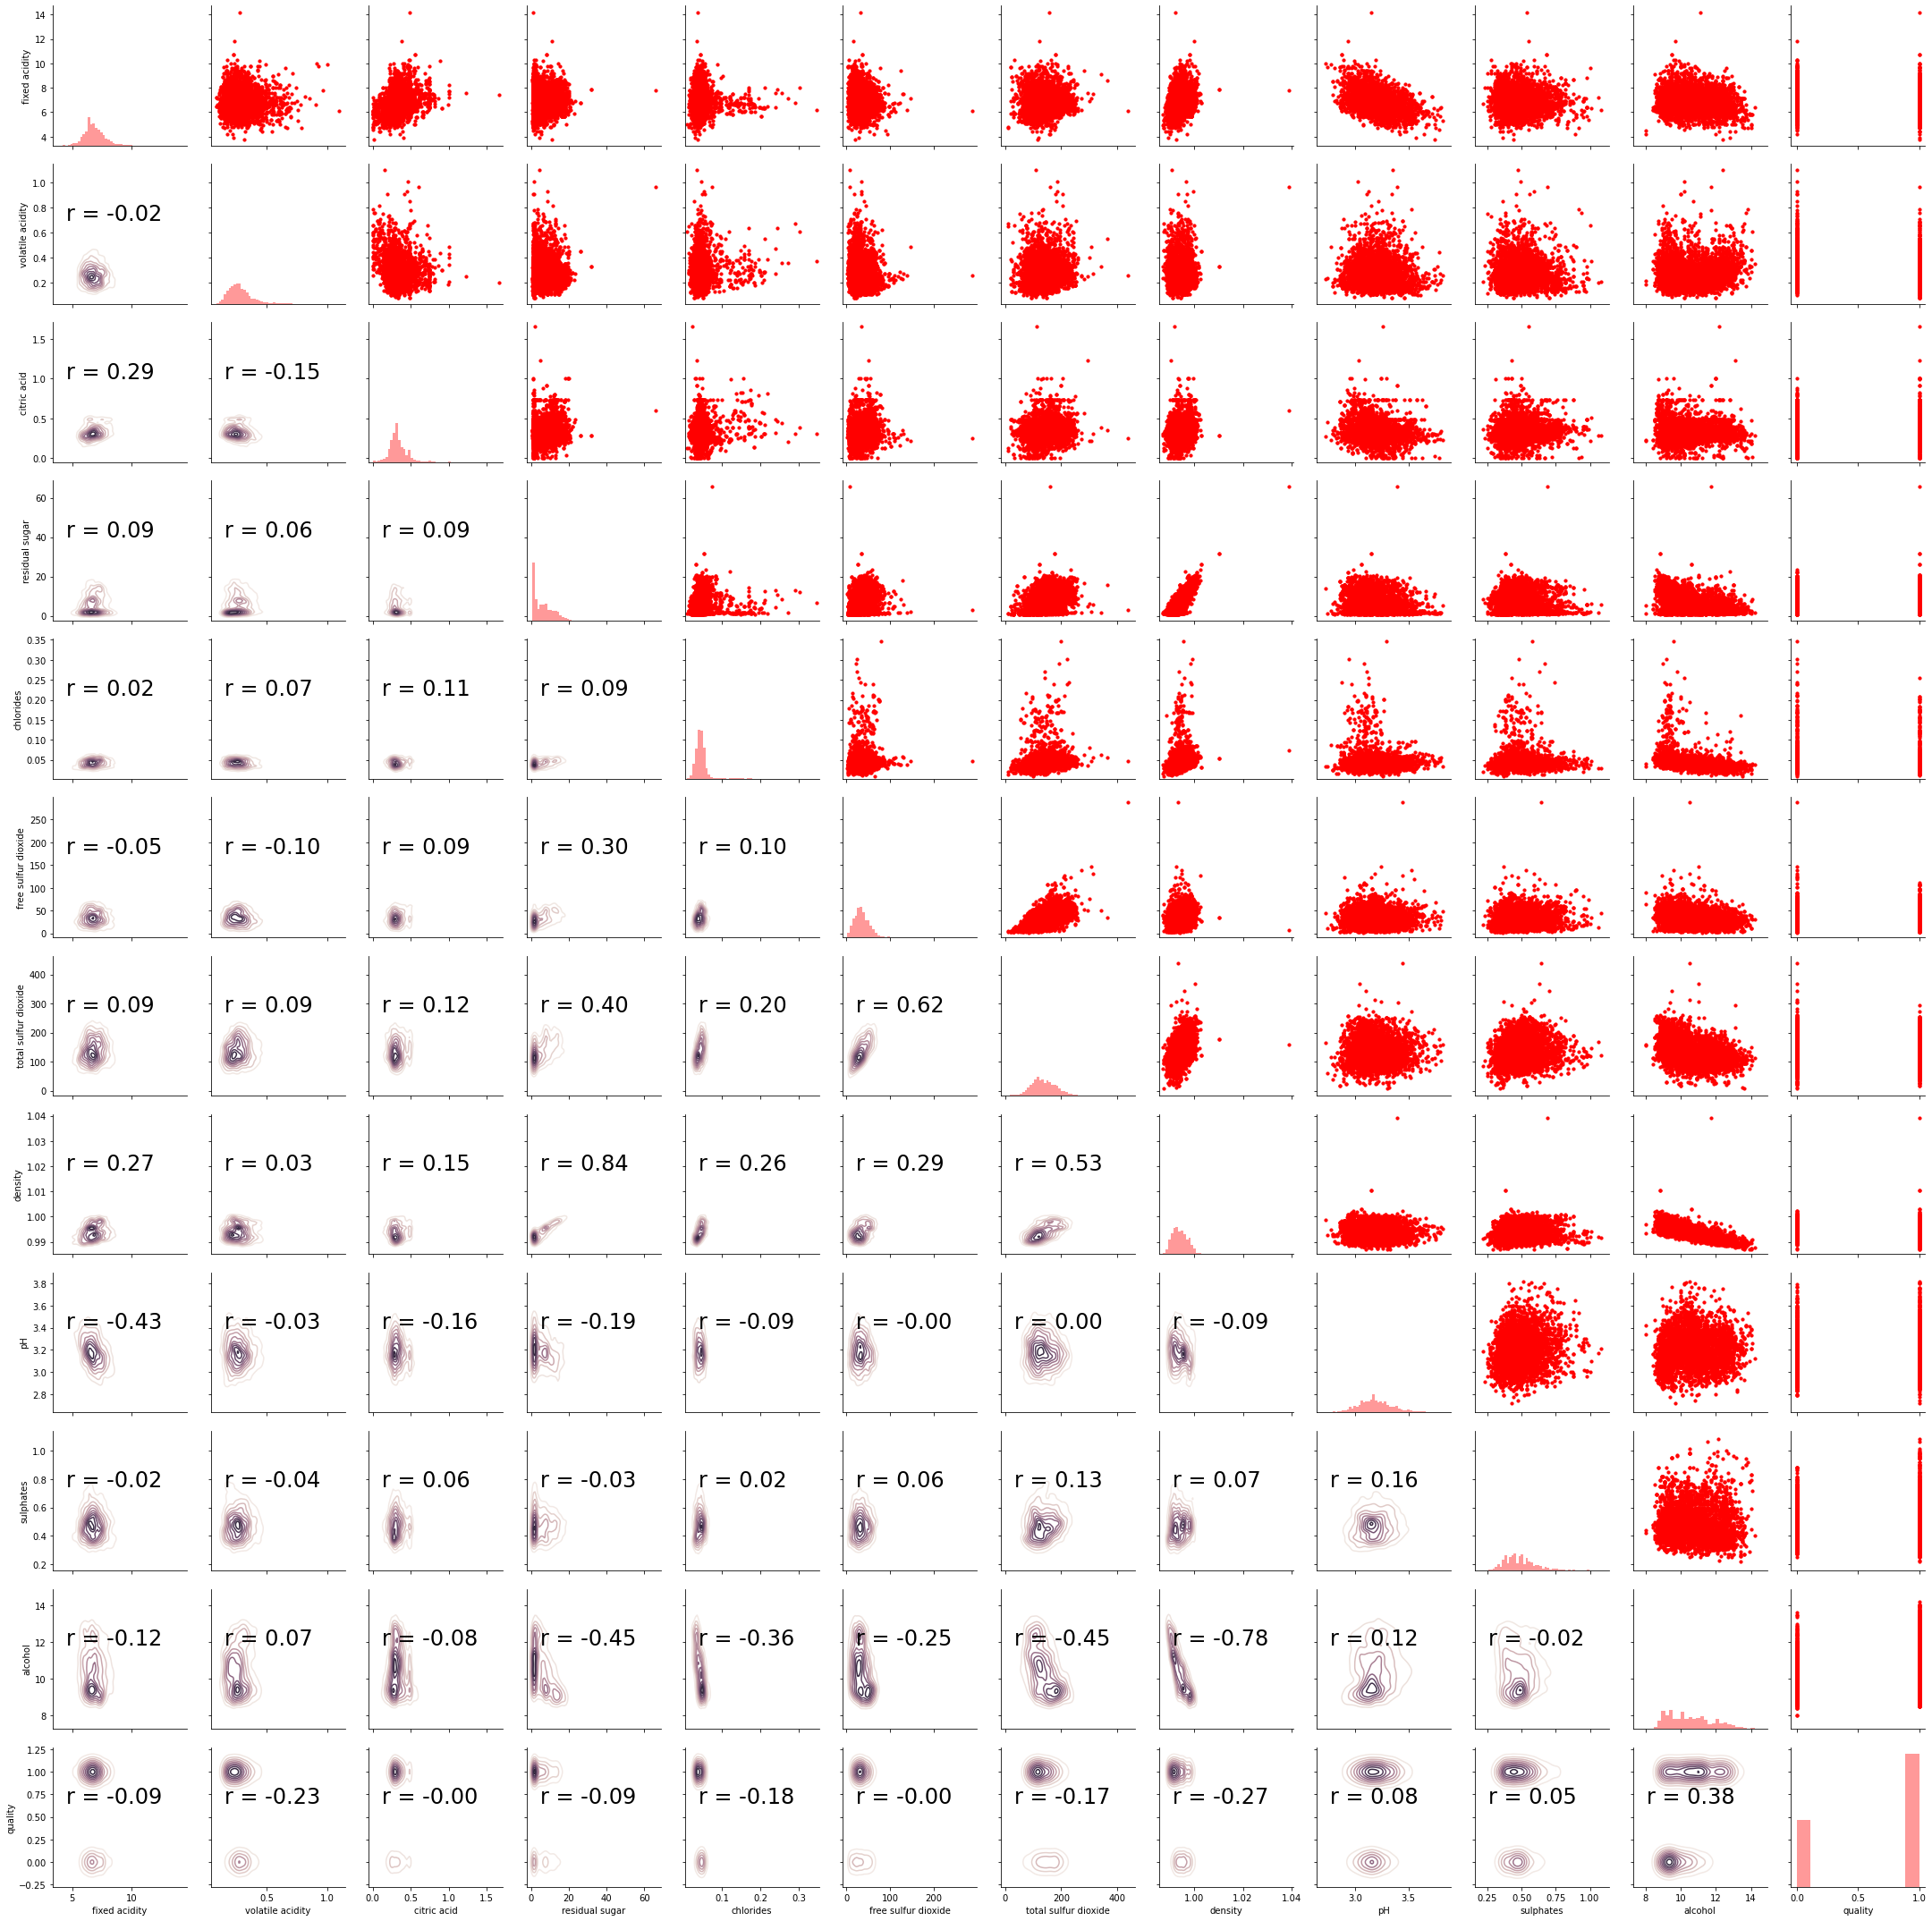

In [15]:
import warnings
warnings.filterwarnings('ignore')


# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(df)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

#### B(15) Drop the redundant features.

In [16]:
df = df.drop(labels=[ 'pH','sulphates','free sulfur dioxide','citric acid', 'residual sugar'], axis = 1)

#### B(16) Write a function named “partition” to split your data into training and test set.

In [17]:
def partition(feature_matrix, target_vector, t):
    import math
    test_size = math.ceil(len(feature_matrix)* t)   
    test_data = feature_matrix[:test_size]
    training_data = feature_matrix[test_size+1:]
    target_training_vec = training_data.index
    target_test_vec = test_data.index
    
    return training_data, test_data, target_training_vec, target_test_vec

In [18]:
training_data, test_data, target_training_vec, target_test_vec = partition(df, df, .2)
Training_data = training_data.values
Test_data = test_data.values

#### B(17) Naively run your KNN_Classifier model on the training dataset with n_neighbors = 5 and using Euclidean distance.

In [19]:
arguments = dict()
arguments['kwargs'] ={'distance':'eucledian_distance', 'threshold':0.5}
arguments

{'kwargs': {'distance': 'eucledian_distance', 'threshold': 0.5}}

In [20]:
A = KNN_Classifier()
arguments = dict()
arguments['kwargs'] = {'distance':'euclidean_distance', 'threshold':0.5}
A.fit(Training_data, target_training_vec, 5, 'uniform', **arguments)
out = A.predict(Test_data)

#### B (17) a. Use accuracy and F1 score to compare your predictions to the expected labels.

In [21]:
Preci, Recall, f1 = precision(out ,Test_data[:, 6])
print('F1 score is: ', f1)
print('Accuracy: ', accuracy_generalization(out ,Test_data[:, 6]))

F1 score is:  0.7994186046511628
Accuracy:  0.7183673469387755


#### B (17) b. Now standardize each feature of your training set (subtract mean and divide by standard deviation). Use the mean and standard deviation values for each feature in the training set to scale the test data.

In [ ]:
Copy_data_frame = df.copy()
Save_training_data = training_data.copy()
Save_test_data = test_data.copy()
x = training_data.describe()
# Standardization applied to training set
for (column, rows) in training_data.iteritems():
    for row in range(len(training_data)):
        training_data[column].iloc[row] = (training_data[column].iloc[row] - x[column].iloc[1])/x[column].iloc[2]

# Standardization applied to test set
for (column, rows) in test_data.iteritems():
    for row in range(len(test_data)):
        test_data[column].iloc[row] = (test_data[column].iloc[row] - x[column].iloc[1])/x[column].iloc[2]
training_data['quality'] = Save_training_data['quality']
test_data['quality'] = Save_test_data['quality']
Training_data = training_data.values
Test_data = test_data.values

##### B(17)c. Re-run the KNN_Classifier model on the standardized data, find the accuracy and F1 score with the expected labels.

In [23]:
B = KNN_Classifier()
arguments = dict()
arguments['kwargs'] = {'distance':'euclidean_distance', 'threshold':0.5}
B.fit(Training_data, target_training_vec, 5, 'uniform', **arguments)
outB = B.predict(Test_data)

In [24]:
Preci, Recall, f1 = precision(out ,Test_data[:, 6])
print('F1 score is: ', f1)
print('Accuracy: ', accuracy_generalization(out ,Test_data[:, 6]))

F1 score is:  0.7994186046511628
Accuracy:  0.7183673469387755


##### B(17)e. [Extra Credit for 353 and Mandatory for 795] Perform a similar test for inverse distance weighting in the KNN_Classifier model and determine whether or not to use it. This will go in the report.

In [25]:
training_data, test_data, target_training_vec, target_test_vec = partition(Copy_data_frame, Copy_data_frame, .2)
Training_data = training_data.values
Test_data = test_data.values

In [26]:
B = KNN_Classifier()
arguments = dict()
arguments['kwargs'] = {'distance':'euclidean_distance', 'threshold':0.5}
B.fit(Training_data, target_training_vec, 5, 'distance', **arguments)
outB = B.predict(Test_data)

In [27]:
Preci, Recall, f1 = precision(out ,Test_data[:, 6])
print('F1 score is: ', f1)
print('Accuracy: ', accuracy_generalization(out ,Test_data[:, 6]))

F1 score is:  0.7994186046511628
Accuracy:  0.7183673469387755


In [ ]:
Save_training_data = training_data.copy()
Save_test_data = test_data.copy()
x = training_data.describe()
# Standardization applied to training set
for (column, rows) in training_data.iteritems():
    for row in range(len(training_data)):
        training_data[column].iloc[row] = (training_data[column].iloc[row] - x[column].iloc[1])/x[column].iloc[2]

# Standardization applied to test set
for (column, rows) in test_data.iteritems():
    for row in range(len(test_data)):
        test_data[column].iloc[row] = (test_data[column].iloc[row] - x[column].iloc[1])/x[column].iloc[2]
training_data['quality'] = Save_training_data['quality']
test_data['quality'] = Save_test_data['quality']
Training_data = training_data.values
Test_data = test_data.values

In [29]:
arguments = dict()
arguments['kwargs'] ={'distance':'eucledian_distance', 'threshold':0.5}
arguments

{'kwargs': {'distance': 'eucledian_distance', 'threshold': 0.5}}

In [30]:
B = KNN_Classifier()
arguments = dict()
arguments['kwargs'] = {'distance':'euclidean_distance', 'threshold':0.5}
B.fit(Training_data, target_training_vec, 5, 'distance', **arguments)
outB = B.predict(Test_data)

In [31]:
Preci, Recall, f1 = precision(out ,Test_data[:, 6])
print('F1 score is: ', f1)
print('Accuracy: ', accuracy_generalization(out ,Test_data[:, 6]))

F1 score is:  0.7994186046511628
Accuracy:  0.7183673469387755


## Part C: Model Evaluation

#### C(18) Evaluation of an estimator performance via cross-validation: Implement the S-fold cross-validation function.

###### Standardization of the data (feature scaling).

In [32]:
df = Copy_data_frame.copy()
Save_df =df.copy()
# Standardization applied to entire data frame
x = df.describe()
for (column, rows) in df.iteritems():
    for row in range(len(df)):
        df[column].iloc[row] = (df[column].iloc[row] - x[column].iloc[1])/x[column].iloc[2]
df['quality'] = Save_df['quality']

In [33]:
def sFold(folds, data, labels, model, model_args, error_function):
    labels_list = labels['quality'].values # 
    data = data.values    
    
    # S-Fold division
    import math
    num_per_fold = math.ceil(len(data)/folds)    
    Test_partitions = []
    Training_partitions = []
    Expected_labels = []
    Predicted_labels =[]
    F1_scores = np.arange(folds)
    Expected_vector = np.array(0)
    Predicted_vector = np.array(0)

    for i in range(folds-1):
        Test_partitions.append(data[num_per_fold*i:num_per_fold+num_per_fold*i])
        Expected_labels.append(labels[num_per_fold*i:num_per_fold+num_per_fold*i]['quality'].values)
        if num_per_fold*i == 0 and len(data)/folds + len(data)/folds * i != len(data):
            Training_partitions.append(data[num_per_fold+num_per_fold*i:])
        elif num_per_fold*i != 0 and len(data)/folds + len(data)/folds * i != len(data):
            Training_partitions.append(np.concatenate((data[:num_per_fold*i], data[num_per_fold+num_per_fold*i:])))
    
    Training_partitions.append(data[:num_per_fold*(folds-1)])
    Test_partitions.append(data[num_per_fold*(folds-1):])
    Expected_labels.append(labels[num_per_fold*(folds-1):]['quality'].values)
    
    # Array containing all the predicted results for all 
    # Run the KNN_Classifier on the newly partion data
    # Return expected values, predicted labels, average error
    for data_in_partitions in range(folds):
        CLASIFIER_MODEL = model()
        CLASIFIER_MODEL.fit(Training_partitions[data_in_partitions],labels_list, **model_args)
        Predicted_labels.append(CLASIFIER_MODEL.predict(Test_partitions[data_in_partitions]))
     
    Expected_vector = np.concatenate((Expected_labels[0], Expected_labels[1]))
    Predicted_vector = np.concatenate((Predicted_labels[0], Predicted_labels[1]))
    for num in range(2, len(Expected_labels)):
        Expected_vector = np.concatenate((Expected_vector, Expected_labels[num]))
        Predicted_vector = np.concatenate((Predicted_vector, Predicted_labels[num]))
    #Error Calculation
    Error_ = 0
    if error_function == 'F1_score':
        Error_ = 0
        error_list = 0
        for i in range(folds):
            pre, recall, f1 = precision(Expected_labels[i], Predicted_labels[i])
            error_list += f1
        Error_ = error_list/folds * 100
    else:
        pass
    # Return dictionary  
    dictionary = dict()
    dictionary["Expected_labels"] = Expected_vector
    dictionary["Predicted_labels"] = Predicted_vector
    dictionary["Error"] = Error_
    return dictionary

#### C(19) Use your sfold function to evaluate the performance of your model over each combination of k and distance metrics.

#### k=[1,5,9,11,21,31,41], distance = Manhattan, weights = uniform

In [34]:
k = [1,5,9,11,21,31,41]
dic_list_uniform_manhattan_distance = []
for i in range(7):
    print('K of: ', k[i])
    args = {'n_neighbors':k[i], 'weights':'uniform', 'kwargs':{'distance':'manhattan_distance', 'threshold':0.5}}
    dic_list_uniform_manhattan_distance.append(sFold(5, df, df, KNN_Classifier,args, 'F1_score'))
    print('F1 score is (error): ', dic_list_uniform_manhattan_distance[i]['Error'], '%')
    print('Accuracy: ', accuracy_generalization(dic_list_uniform_manhattan_distance[i]["Expected_labels"], dic_list_uniform_manhattan_distance[i]["Predicted_labels"]) * 100, ' %')

K of:  1
F1 score is (error):  83.58200695890933 %
Accuracy:  78.15434871376073  %
K of:  5


KeyboardInterrupt: 

##### Data fo the report

In [ ]:
k = [1,5,9,11,21,31,41]
for i in range(7):
    Preci, Recall, f1 = precision(dic_list_uniform_manhattan_distance[i]["Expected_labels"], dic_list_uniform_manhattan_distance[i]["Predicted_labels"])
    print('K: ', k[i])
    print('Precision: ', Preci)
    print('Recall: ', Recall)
    print('F1: ', f1)

#### k=[1,5,9,11,21,31,41], distance = Euclidean, weights = uniform

In [ ]:
k = [1,5,9,11,21,31,41]
dic_list_uniform_euclidean_distance = []
for i in range(7):
    print('K of: ', k[i])
    args = {'n_neighbors':k[i], 'weights':'uniform', 'kwargs':{'distance':'euclidean_distance', 'threshold':0.5}}
    dic_list_uniform_euclidean_distance.append(sFold(5, df, df, KNN_Classifier,args, 'F1_score'))
    print('F1 score is (error): ', dic_list_uniform_euclidean_distance[i]['Error'], '%')
    print('Accuracy: ', accuracy_generalization(dic_list_uniform_euclidean_distance[i]["Expected_labels"], dic_list_uniform_euclidean_distance[i]["Predicted_labels"]) * 100, ' %')

##### Data for the report:

In [ ]:
k = [1,5,9,11,21,31,41]
for i in range(7):
    Preci, Recall, f1 = precision(dic_list_uniform_euclidean_distance[i]["Expected_labels"], dic_list_uniform_euclidean_distance[i]["Predicted_labels"])
    print('K: ', k[i])
    print('Precision: ', Preci)
    print('Recall: ', Recall)
    print('F1: ', f1)

#### k=[1,5,9,11], distance = Euclidean, weights = distance, Extra Credit: weights = [uniform, distance]

In [ ]:
k = [1,5,9,11,21,31,41]
dic_list_distance_euclidean_distance = []
for i in range(7):
    print('K of: ', k[i])
    args = {'n_neighbors':k[i], 'weights':'distance', 'kwargs':{'distance':'euclidean_distance', 'threshold':0.5}}
    dic_list_distance_euclidean_distance.append(sFold(5, df, df, KNN_Classifier,args, 'F1_score'))
    print('F1 score is (error): ', dic_list_distance_euclidean_distance[i]['Error'], '%')
    print('Accuracy: ', accuracy_generalization(dic_list_distance_euclidean_distance[i]["Expected_labels"], dic_list_distance_euclidean_distance[i]["Predicted_labels"]) * 100, ' %')

##### Data for the report

In [ ]:
k = [1,5,9,11,21,31,41]
for i in range(7):
    Preci, Recall, f1 = precision(dic_list_distance_euclidean_distance[i]["Expected_labels"], dic_list_distance_euclidean_distance[i]["Predicted_labels"])
    print('K: ', k[i])
    print('Precision: ', Preci)
    print('Recall: ', Recall)
    print('F1: ', f1)

#### k=[1,5,9,11,21,31,41], distance = Manhattan, weights = distance, Extra Credit: weights = [uniform, distance]

In [ ]:
k = [1,5,9,11,21,31,41]
dic_list_distance_manhattan_distance = []
for i in range(7):
    print('K of: ', k[i])
    args = {'n_neighbors':k[i], 'weights':'distance', 'kwargs':{'distance':'manhattan_distance', 'threshold':0.5}}
    dic_list_distance_manhattan_distance.append(sFold(5, df, df, KNN_Classifier,args, 'F1_score'))
    print('F1 score is (error): ', dic_list_distance_manhattan_distance[i]['Error'], '%')
    print('Accuracy: ', accuracy_generalization(dic_list_distance_manhattan_distance[i]["Expected_labels"], dic_list_distance_manhattan_distance[i]["Predicted_labels"]) * 100, ' %')

##### Data for the report

In [ ]:
k = [1,5,9,11,21,31,41]
for i in range(7):
    Preci, Recall, f1 = precision(dic_list_distance_manhattan_distance[i]["Expected_labels"], dic_list_distance_manhattan_distance[i]["Predicted_labels"])
    print('K: ', k[i])
    print('Precision: ', Preci)
    print('Recall: ', Recall)
    print('F1: ', f1)

In [ ]:
sfold = [7,9,11,21]
dic_list_distance_manhattan_distance = []
for i in range(4):
    print('Sfold of: ', sfold[i])
    args = {'n_neighbors':41, 'weights':'distance', 'kwargs':{'distance':'manhattan_distance', 'threshold':0.5}}
    dic_list_distance_manhattan_distance.append(sFold(sfold[i], df, df, KNN_Classifier,args, 'F1_score'))
    print('F1 score is (error): ', dic_list_distance_manhattan_distance[i]['Error'], '%')
    print('Accuracy: ', accuracy_generalization(dic_list_distance_manhattan_distance[i]["Expected_labels"], dic_list_distance_manhattan_distance[i]["Predicted_labels"]) * 100, ' %')

##### C(20) Evaluate your model on the test data and report the performance measures.

In [ ]:
Preci, Recall, f1 = precision(dic_list_distance_manhattan_distance[3]["Expected_labels"], dic_list_distance_manhattan_distance[3]["Predicted_labels"])
accuracy = accuracy_generalization(dic_list_distance_manhattan_distance[3]["Expected_labels"], dic_list_distance_manhattan_distance[3]["Predicted_labels"])
print('Parameters chosen based on the highest F1_score and accuracy error: sFolds =21, k = 41, distance = manhattan, weights = distance.')
print(" ")
print('Precision: ', Preci)
print('Recall: ', Recall)
print('F1: ', f1)
print(" ")
print('              Confusion Matrix')
matrix = confusion_matrix(dic_list_distance_manhattan_distance[3]["Expected_labels"], dic_list_distance_manhattan_distance[3]["Predicted_labels"])
print('Accuracy: ', accuracy)
print('Generalization: ', 1 - accuracy)

##### C(21) Generate the ROC curve and determine the optimal threshold. This will go in your report.

In [35]:
# Run the classifier on different thresholds
threshold = [.2, .3, .4, .5, .6, .7, .8]
dic_list = []
for i in range(len(threshold)):
    args = {'n_neighbors':41, 'weights':'distance', 'kwargs':{'distance':'manhattan_distance', 'threshold':threshold[i]}}
    dic_list.append(sFold(21, df, df, KNN_Classifier, args, 'none'))

ROC Curve:


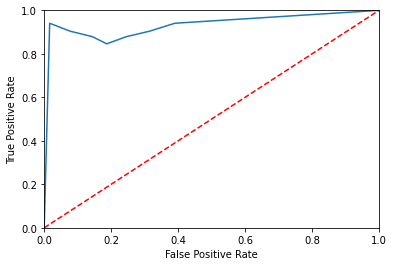

In [36]:
# Preprocess the TPR and FPR for ROC curve
sort_values_list = []
confusion_matrix_list = []
for i in range(len(threshold)):
        confusion_matrix_list.append(confusion_matrix(dic_list[i]["Expected_labels"], dic_list[i]["Predicted_labels"]))
        if confusion_matrix_list[i][0] + confusion_matrix_list[i][1] != 0:
            sort_values_list.append([confusion_matrix_list[i][1]/(confusion_matrix_list[i][0] + confusion_matrix_list[i][1]), confusion_matrix_list[i][3]/(confusion_matrix_list[i][2] + confusion_matrix_list[i][3])])
        else:
            sort_values_list.append([0, confusion_matrix_list[i][3]/(confusion_matrix_list[i][2] + confusion_matrix_list[i][3])])
# Sort values by FPR
sort_values_list.sort()
TPR = []
FPR = []
TPR.append(0)
FPR.append(0)
for i in range(len(threshold)):
    TPR.append(sort_values_list[i][1])
    FPR.append(sort_values_list[i][0])

TPR.append(1)
FPR.append(1)   

#Plot roc
print('ROC Curve:')
roc(TPR, FPR)

##### C(22) Compute the AUC score.

In [37]:
#Pre process data for AUC score
AUC_TPR = []
AUC_FPR = []
for i in range(len(threshold)):
    AUC_TPR.append(sort_values_list[i][1])
    AUC_FPR.append(sort_values_list[i][0])

#Calculate the score
auc(AUC_TPR, AUC_FPR)

AUC is : 0.9076637563708967


0.9076637563708967

##### C(23) [Extra Credit] Generate precision-recall curve and determine the optimal treshold.

Precision Recall Curve:


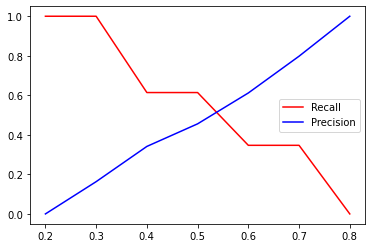

In [38]:
#Pre process data for precision_recall curve

for i in range(len(threshold)):
    confusion_matrix_list.append(confusion_matrix(dic_list[i]["Expected_labels"], dic_list[i]["Predicted_labels"]))
    sort_values_list.append([confusion_matrix_list[i][3]/(confusion_matrix_list[i][1] + confusion_matrix_list[i][3]), confusion_matrix_list[i][3]/(confusion_matrix_list[i][2] + confusion_matrix_list[i][3])])
recall_= []
precision_ = []

for i in range(len(threshold)):
    recall_.append(sort_values_list[i][1])
    precision_.append(sort_values_list[i][0])
precision_.sort()
recall_.sort(reverse=True)

# Data Normalization
recall_min = min(recall_)
recall_max = max(recall_)
precision_min = min(precision_)
precision_max = max(precision_)

for j  in range(len(threshold)):
    precision_[j] = (precision_[j] - precision_min)/(precision_max - precision_min)
    recall_[j] = (recall_[j] - recall_min)/(recall_max - recall_min)

#Plot
print('Precision Recall Curve:')
precision_recall(recall_, precision_)

##### C(24) Calculate and report the 95% confidence interval on the generalization error estimate.

In [39]:
error = 1 - accuracy_generalization(dic_list_distance_manhattan_distance[3]["Expected_labels"], dic_list_distance_manhattan_distance[3]["Predicted_labels"])

interval = 1.96 * np.sqrt( (error * (1 - error)) / len(dic_list_distance_manhattan_distance[3]["Expected_labels"]))

print('Upper Bound is: ', error+interval)
print('Lower Bound is: ', error-interval)

NameError: name 'dic_list_distance_manhattan_distance' is not defined

## Part D: Written Report Section

#### 25) Data summary:
I. White wine data set includes eleven attributes (fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol) and an output variable (quality). KNN classifier estimates a target function by two distance measures: euclidean distance, manhattan distance and by two weight functions: uniform (all neighbors are weighted equally) or distance (weights are dependent on the inverse of their distance).

II.

In [ ]:
df = Copy_data_frame.copy()
df.describe()

III. Standardization didn’t show any improvement when used without sFold function and paired with k = 5, distance = [euclidean distance, manhattan distance] and weight = [uniform, distance]. However, standardization showed improvement with sFold and distance weight functions.

IV. Following features were dropprd due to their low correlation with output variable: 
```
pH                      0.099427
sulphates               0.053678 
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
```
#### 26) Method:

I. Brute force KNN classifier has the run time complexity of O(n * m). Where n represents the number of rows in the validation set, and m is the number of dimensions. Since a is much larger than m run time complexity can be reduced to O(n).

II. Accuracy decreases ~3 - 4% when k > 1. This effect is observed only in the classifiers that used both distance functions and the uniform weight function. It doesn’t happen to the classifiers that uses the distance weight function.

III. KNN classifier shows a about 6% improvement in accuracy when the distance weight function is used.


#### 27)Results:


I. Classifiers with uniform weight function exhibited F1 score between ~0.84 > F1 > ~0.81 and classifiers with distance weight function exhibited F1 score between ~0.87 > F1 > ~0.84. Accuracy output was between ~79% > accuracy > ~75% and between ~82% > accuracy > ~78% respectively. Larger k proved to have a positive effect on F1 score as well as accuracy. Both weight functions performed similarly when paired with the same weight function. When the number of folds was increased both accuracy and F1 score improved as well.

II. Accuracy reached 83.68%, that means that this classifier is beginning to approach a reasonable class separation. Perhaps a different feature scaling technique would further improve the performance of the classifier.

III. Clasifier performed fairly well with the uniform weight function. However, distance weight function produced more promissing results both in terms of F1 score and accuracy. Classifier that use distance weight function produce high accuracy as well as high F1 score which means that both precision and recall are high. It would be desirable for maximizing both precision and recall. Also, threshold can be manipulated in order to change ethier recall or precision. This can be desired in order to maximize true positive rate or false positive rate.

***
#### Best classifier:
<b>Classifier with k = 41, distance = Manhattan distance and weight = distance parameters produced the best resul and was used for different sfold test. (Please see the end of this page.)</b>

##### Performance of the best classifier:
<b>K:  41,
Precision:  0.9137507673419276,
Recall:  0.8360011232799776,
F1:  0.8731485555066726,
Accuracy:  82.33973050224581  %,
sfold: 21</b>
```
            Confusion Matrix
      Predicted: NO      Predicted: YES 
 
Actual: NO      1097        242
 
Actual: YES      543        3016
```
***
#### Performance of all the classifiers:
***
<b>Parameters used: distance = Manhattan distance, weight = distance</b>

K:  1, 
Precision:  0.8351749539594844, 
Recall:  0.8413729128014842, 
F1:  0.8382624768946395, 
Accuracy:  78.56267864434463  %

K:  5, 
Precision:  0.8787599754450584, 
Recall:  0.8342074592074592, 
F1:  0.8559043348281017, 
Accuracy:  80.31849734585546  %

K:  9,
Precision:  0.8931860036832413,
Recall:  0.8405545927209706,
F1:  0.8660714285714286,
Accuracy:  81.62515312372398  %

K:  11,
Precision:  0.8971761817065684,
Recall:  0.8380160550458715,
F1:  0.866587607471094,
Accuracy:  81.62515312372398  %

K:  21,
Precision:  0.9030079803560467,
Recall:  0.8403313339045987,
F1:  0.8705429797307294,
Accuracy:  82.13556553695386  %

K:  31,
Precision:  0.9116022099447514,
Recall:  0.8380361173814899,
F1:  0.8732725668920905,
Accuracy:  82.4009799918334  %

<b>K:  41,
Precision:  0.9137507673419276,
Recall:  0.8360011232799776,
F1:  0.8731485555066726,
Accuracy:  82.33973050224581  % </b>
***
***
<b>Parameters used: distance = Euclidean distance, weight = distance</b>

K:  1
Precision:  0.8419275629220381,
Recall:  0.8393512851897185,
F1:  0.8406374501992032,
Accuracy:  78.76684360963658  %

K:  5
Precision:  0.8772252915899325,
Recall:  0.8334791484397783,
F1:  0.8547928817107822,
Accuracy:  80.17558187015108  %

K:  9
Precision:  0.8888888888888888,
Recall:  0.8369942196531792,
F1:  0.8621613575468889,
Accuracy:  81.09432421396488  %

K:  11
Precision:  0.8953345610804174,
Recall:  0.8391829689298044,
F1:  0.8663498663498663,
Accuracy:  81.62515312372398  %

K:  21
Precision:  0.9005524861878453,
Recall:  0.8394849785407725,
F1:  0.8689471346068414,
Accuracy:  81.93140057166191  %

K:  31
Precision:  0.907305095150399,
Recall:  0.8381060391267366,
F1:  0.8713338246131171,
Accuracy:  82.17639853001225  %

<b>K:  41
Precision:  0.9119091467157765,
Recall:  0.8371372217526064,
F1:  0.8729249302188923,
Accuracy:  82.33973050224581  % </b>
***
***
<b>Parameters used: distance = Euclidean distance, weight = uniform</b>

<b>K:  1,
Precision:  0.8419275629220381,
Recall:  0.8393512851897185,
F1:  0.8406374501992032,
Accuracy:  78.76684360963658  %</b>

K:  5,
Precision:  0.8468385512584408,
Recall:  0.7973988439306359,
F1:  0.8213754093480202,
Accuracy:  75.5002041649653  %

K:  9,
Precision:  0.8520564763658687,
Recall:  0.7899829254410927,
F1:  0.819846426461902,
Accuracy:  75.09187423438138  %

K:  11,
Precision:  0.8594229588704727,
Recall:  0.7909604519774012,
F1:  0.8237716975581053,
Accuracy:  75.54103715802368  %

K:  21,
Precision:  0.8670963781461019,
Recall:  0.7888857860932701,
F1:  0.8261441731247259,
Accuracy:  75.72478562678644  %

K:  31,
Precision:  0.8732351135666053,
Recall:  0.7869986168741355,
F1:  0.8278772006401862,
Accuracy:  75.84728460596162  %

K:  41,
Precision:  0.878146101903008,
Recall:  0.7864211105002749,
F1:  0.8297563805104409,
Accuracy:  76.03103307472438  %
***
***
<b>Parameters used: distance = Manhattan distance, weight = uniform</b>

<b>K:  1,
Precision:  0.8351749539594844,
Recall:  0.8413729128014842,
F1:  0.8382624768946395,
Accuracy:  78.56267864434463  %</b>

K:  5,
Precision:  0.8428483732351135,
Recall:  0.7929540860525556,
F1:  0.8171403065020086,
Accuracy:  74.90812576561862  %

K:  9,
Precision:  0.8548189073050951,
Recall:  0.7966247139588101,
F1:  0.8246964761622743,
Accuracy:  75.82686810943243  %

K:  11,
Precision:  0.8603437691835482,
Recall:  0.7936013590033975,
F1:  0.8256259204712812,
Accuracy:  75.82686810943243  %

K:  21,
Precision:  0.8689379987722529,
Recall:  0.7927751330159619,
F1:  0.8291111436520721,
Accuracy:  76.17394855042875  %

K:  31,
Precision:  0.874462860650706,
Recall:  0.7865819988956377,
F1:  0.8281976744186047,
Accuracy:  75.86770110249081  %

K:  41,
Precision:  0.8769183548189073,
Recall:  0.7855375309320869,
F1:  0.8287164612037708,
Accuracy:  75.88811759902  %
***

***
<b>Sfold results for the best classifier.</b>

Sfold of:  7,
F1 score is (error):  0.8777416721611804,
Accuracy:  82.99305839118007 %

Sfold of:  9
F1 score is (error):  0.880496368736577,
Accuracy:  83.40138832176397 %

Sfold of:  11
F1 score is (error):  0.8817722464821298,
Accuracy:  83.56472029399755 %

<b>Sfold of:  21
F1 score is (error):  0.8821256488021059,
Accuracy:  83.68721927317272 %</b>
***
***
#### Confision matricies produced by varing thresholds.
(Classifier: k = 41, distance = Manhattan distance, weight = distance and sfold  = 21:)
```
            Confusion Matrix
             Threshold = 0.2

     Predicted: NO      Predicted: YES 
 
Actual: NO      1480        1050
 
Actual: YES      160        2208

            Confusion Matrix
             Threshold = 0.3
 
      Predicted: NO      Predicted: YES 
 
Actual: NO      1333        682
 
Actual: YES      307        2576

            Confusion Matrix
             Threshold = 0.4
 
      Predicted: NO      Predicted: YES 
 
Actual: NO      1206        446
 
Actual: YES      434        2812

            Confusion Matrix
             Threshold = 0.5
 
      Predicted: NO      Predicted: YES 
 
Actual: NO      1056        281
 
Actual: YES      584        2977

            Confusion Matrix
             Threshold = 0.6
 
      Predicted: NO      Predicted: YES 
 
Actual: NO      882        163
 
Actual: YES      434        2812

            Confusion Matrix
             Threshold = 0.7
 
      Predicted: NO      Predicted: YES 
 
Actual: NO      688        79
 
Actual: YES      307        2576

            Confusion Matrix
             Threshold = 0.8
 
      Predicted: NO      Predicted: YES 
 
Actual: NO      524        16
 
Actual: YES      160        2208
```
***